In [1]:
import datetime 
from matplotlib import pyplot as plt 

In [2]:
def analyse(data: str) -> tuple:
    time_received = []
    time_inserted = []
    value_received = []
    value_inserted = []
    for line in data.strip().split("\n"):
        if line.startswith('Level 21'):
            time = line[11:34]
            time = datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S.%f')
            time_received.append(time)
            value = int(line[37:])
            value_received.append(value)
        if line.startswith('Level 22'):
            time = line[11:34]
            time = datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S.%f')
            time_inserted.append(time)
            value = int(line[37:])
            value_inserted.append(value)
    time_received_ms = []
    for i in range(len(time_received)):
        delta = time_received[i]-time_received[0]
        time_received_ms.append((delta.microseconds + 1e6*delta.seconds)/1e3)
    time_inserted_ms = []
    for i in range(len(time_inserted)):
        delta = time_inserted[i]-time_inserted[0]
        time_inserted_ms.append((delta.microseconds + 1e6*delta.seconds)/1e3)
    value_received_sum = [sum(value_received[:i+1]) for i in range(len(value_received))]
    value_inserted_sum = [sum(value_inserted[:i+1]) for i in range(len(value_inserted))]
    return ((time_received_ms,value_received_sum),(time_inserted_ms,value_inserted_sum))

In [3]:
with open('postmongo_amqp.log','r',encoding='utf-8') as f:
    pika_data = f.read()

with open('postmongo_socket.log','r',encoding='utf-8') as f:
    socket_data = f.read()

pika = analyse(pika_data)
socket = analyse(socket_data)

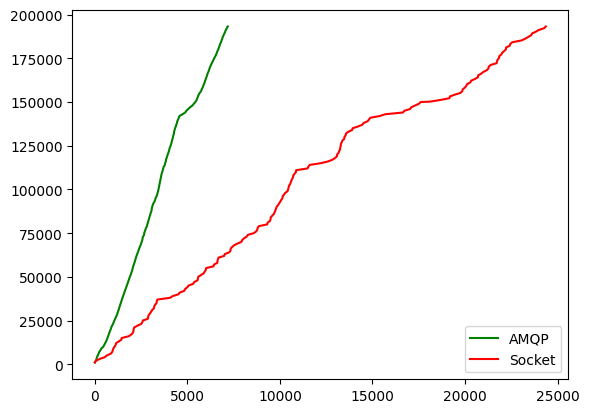

In [6]:
plt.plot(*(pika[0]),color='green',label='AMQP')
plt.plot(*(socket[0]),color='red', label='Socket')
plt.legend(loc=4)

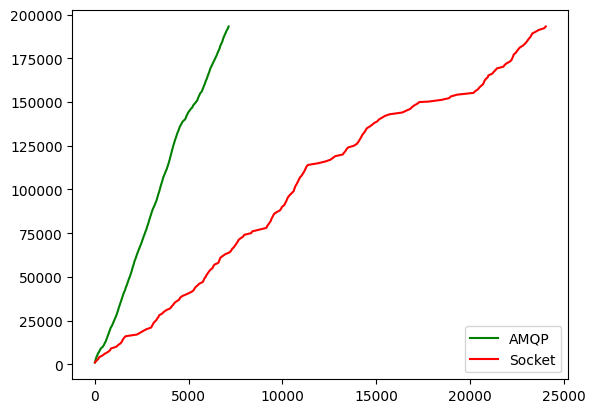

In [7]:
plt.plot(*(pika[1]),color='green',label='AMQP')
plt.plot(*(socket[1]),color='red', label='Socket')
plt.legend(loc=4)

In [10]:
import numpy as np
from statistics import mean


In [18]:
amqp_time = np.array(pika[0][0])
sock_time = np.array(socket[0][0])
amqp_value = np.array(pika[0][1])
sock_value = np.array(socket[0][1])

In [20]:
mean((amqp_time[1:]-amqp_time[:-1])/(amqp_value[1:]-amqp_value[:-1])*1000)

37.748395683795216

In [21]:
mean((sock_time[1:]-sock_time[:-1])/(sock_value[1:]-sock_value[:-1])*1000)

135.57384608071493